In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
store = pd.read_csv("../dataset/stores data-set.csv") # loading dataset

In [3]:
features = pd.read_csv("../dataset/Features data set.csv") # loading dataset

In [4]:
sale = pd.read_csv("../dataset/sales data-set.csv") # loading dataset

In [5]:
sale.shape # shape

(421570, 5)

In [6]:
sale.head() # first 5 records

,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,05/02/2010,24924.50,False
1,1,1,12/02/2010,46039.49,True
2,1,1,19/02/2010,41595.55,False
3,1,1,26/02/2010,19403.54,False
4,1,1,05/03/2010,21827.90,False


In [7]:
sale.isna().mean() # checking NaNs %

Store           0.0
Dept            0.0
Date            0.0
Weekly_Sales    0.0
IsHoliday       0.0
dtype: float64

In [8]:
store.shape # shape

(45, 3)

In [9]:
store.head() # first 5 records

,Store,Type,Size
0,1,A,151315
1,2,A,202307
2,3,B,37392
3,4,A,205863
4,5,B,34875


In [10]:
store.isna().mean() # checking NaNs %

Store    0.0
Type     0.0
Size     0.0
dtype: float64

In [11]:
features.shape # shape

(8190, 12)

In [12]:
features.head() # first 5 records

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,1,05/02/2010,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
1,1,12/02/2010,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True
2,1,19/02/2010,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False
3,1,26/02/2010,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False
4,1,05/03/2010,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False


In [13]:
features.isna().mean() # checking NaNs %

Store           0.000000
Date            0.000000
Temperature     0.000000
Fuel_Price      0.000000
MarkDown1       0.507692
MarkDown2       0.643346
MarkDown3       0.558852
MarkDown4       0.577045
MarkDown5       0.505495
CPI             0.071429
Unemployment    0.071429
IsHoliday       0.000000
dtype: float64

In [14]:
# inner join two dataframe by store , date , isholiday
df = pd.merge(sale,features, on=['Store','Date', 'IsHoliday'], how='inner') 

# inner join two datafrome by store 
df = pd.merge(df,store, on=['Store'], how='inner')

In [15]:
df.shape # shape

(421570, 16)

In [16]:
df.head() # first 5 records

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size
0,1,1,05/02/2010,24924.50,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315
1,1,2,05/02/2010,50605.27,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315
2,1,3,05/02/2010,13740.12,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315
3,1,4,05/02/2010,39954.04,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315
4,1,5,05/02/2010,32229.38,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315


In [17]:
df.info() # getting info berif 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 421570 entries, 0 to 421569
Data columns (total 16 columns):
Store           421570 non-null int64
Dept            421570 non-null int64
Date            421570 non-null object
Weekly_Sales    421570 non-null float64
IsHoliday       421570 non-null bool
Temperature     421570 non-null float64
Fuel_Price      421570 non-null float64
MarkDown1       150681 non-null float64
MarkDown2       111248 non-null float64
MarkDown3       137091 non-null float64
MarkDown4       134967 non-null float64
MarkDown5       151432 non-null float64
CPI             421570 non-null float64
Unemployment    421570 non-null float64
Type            421570 non-null object
Size            421570 non-null int64
dtypes: bool(1), float64(10), int64(3), object(2)
memory usage: 51.9+ MB


In [18]:
df.isna().mean() * 100 # checking NaNs %

Store            0.000000
Dept             0.000000
Date             0.000000
Weekly_Sales     0.000000
IsHoliday        0.000000
Temperature      0.000000
Fuel_Price       0.000000
MarkDown1       64.257181
MarkDown2       73.611025
MarkDown3       67.480845
MarkDown4       67.984676
MarkDown5       64.079038
CPI              0.000000
Unemployment     0.000000
Type             0.000000
Size             0.000000
dtype: float64

Markdowns are the discounted Prices. NaNs represents the non discounted State. So the only Filling with Zero is logical fix here.

In [19]:
df = df.fillna(0).copy() # Imputation

In [20]:
df.isna().mean() * 100 # verify updates

Store           0.0
Dept            0.0
Date            0.0
Weekly_Sales    0.0
IsHoliday       0.0
Temperature     0.0
Fuel_Price      0.0
MarkDown1       0.0
MarkDown2       0.0
MarkDown3       0.0
MarkDown4       0.0
MarkDown5       0.0
CPI             0.0
Unemployment    0.0
Type            0.0
Size            0.0
dtype: float64

In [21]:
df.head() # first 5 records

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size
0,1,1,05/02/2010,24924.50,False,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,A,151315
1,1,2,05/02/2010,50605.27,False,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,A,151315
2,1,3,05/02/2010,13740.12,False,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,A,151315
3,1,4,05/02/2010,39954.04,False,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,A,151315
4,1,5,05/02/2010,32229.38,False,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,A,151315


In [22]:
df.info() # checking datatype

<class 'pandas.core.frame.DataFrame'>
Int64Index: 421570 entries, 0 to 421569
Data columns (total 16 columns):
Store           421570 non-null int64
Dept            421570 non-null int64
Date            421570 non-null object
Weekly_Sales    421570 non-null float64
IsHoliday       421570 non-null bool
Temperature     421570 non-null float64
Fuel_Price      421570 non-null float64
MarkDown1       421570 non-null float64
MarkDown2       421570 non-null float64
MarkDown3       421570 non-null float64
MarkDown4       421570 non-null float64
MarkDown5       421570 non-null float64
CPI             421570 non-null float64
Unemployment    421570 non-null float64
Type            421570 non-null object
Size            421570 non-null int64
dtypes: bool(1), float64(10), int64(3), object(2)
memory usage: 51.9+ MB


In [23]:
df['Date'] = pd.to_datetime(df['Date']) # changing to Datetime

In [24]:
df['IsHoliday'] = df['IsHoliday'].astype(int) # changing datatype to int

In [25]:
df.info() # verify updates

<class 'pandas.core.frame.DataFrame'>
Int64Index: 421570 entries, 0 to 421569
Data columns (total 16 columns):
Store           421570 non-null int64
Dept            421570 non-null int64
Date            421570 non-null datetime64[ns]
Weekly_Sales    421570 non-null float64
IsHoliday       421570 non-null int32
Temperature     421570 non-null float64
Fuel_Price      421570 non-null float64
MarkDown1       421570 non-null float64
MarkDown2       421570 non-null float64
MarkDown3       421570 non-null float64
MarkDown4       421570 non-null float64
MarkDown5       421570 non-null float64
CPI             421570 non-null float64
Unemployment    421570 non-null float64
Type            421570 non-null object
Size            421570 non-null int64
dtypes: datetime64[ns](1), float64(10), int32(1), int64(3), object(1)
memory usage: 53.1+ MB


In [26]:
df = df.reindex(
    columns=['Date', 'Store', 'Dept','Type', 'Size', 'MarkDown1',
             'MarkDown2', 'MarkDown3', 'MarkDown4','MarkDown5',
             'CPI','Temperature','Fuel_Price','Unemployment',
             'IsHoliday', 'Weekly_Sales']
).copy() # re-ordering

In [27]:
df.info() # verify updates

<class 'pandas.core.frame.DataFrame'>
Int64Index: 421570 entries, 0 to 421569
Data columns (total 16 columns):
Date            421570 non-null datetime64[ns]
Store           421570 non-null int64
Dept            421570 non-null int64
Type            421570 non-null object
Size            421570 non-null int64
MarkDown1       421570 non-null float64
MarkDown2       421570 non-null float64
MarkDown3       421570 non-null float64
MarkDown4       421570 non-null float64
MarkDown5       421570 non-null float64
CPI             421570 non-null float64
Temperature     421570 non-null float64
Fuel_Price      421570 non-null float64
Unemployment    421570 non-null float64
IsHoliday       421570 non-null int32
Weekly_Sales    421570 non-null float64
dtypes: datetime64[ns](1), float64(10), int32(1), int64(3), object(1)
memory usage: 53.1+ MB


In [28]:
def charts(data , choice = 0 , size = (15,8)): # Data Visualization Function
    
    plt.figure(figsize=size) # Plot Figure Size
    
    if choice == 0: # Histogram Plot
        sns.distplot(data , kde = False)
        plt.show()
        
    elif choice == 1: # Bar Plot
        data = data.value_counts()
        sns.barplot(x = data.index , y = data.values , order = data.index)
        plt.show()
        
    elif choice == 2: # Distribution Plot
        sns.distplot(data , hist = False)
        plt.show()

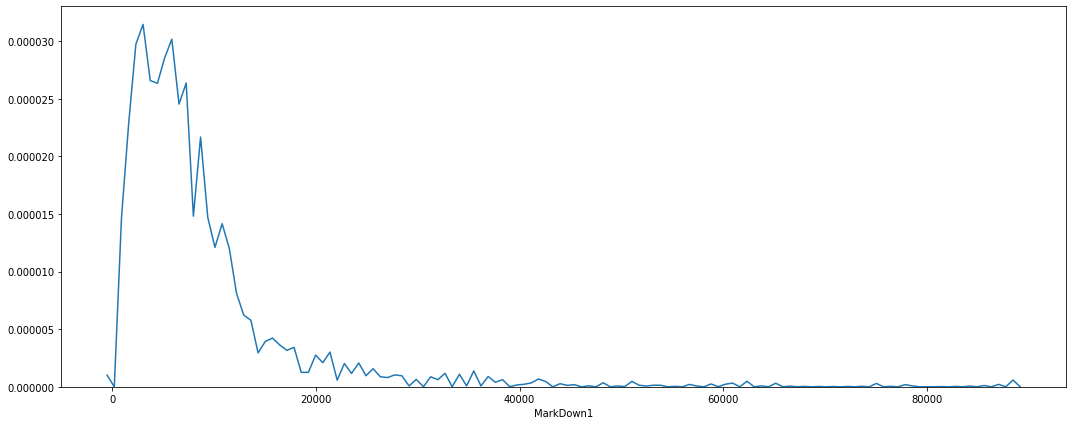

In [29]:
charts(df['MarkDown1'] , 2 , (18,7))